# Exercise 6: Data cleaning 

Now you have a new dataset flicker.csv” available on Moodle. You have to define your own strategy to clean this data and comment your notebook at each step.

### Importing the libraries

We are first going to import the necessary libraries that we need in order to clean the data: pandas, numpy, and matplotlib.

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load the data set "flicker.csv"
To load the dataset "Olympics.csv" we will use the following pandas method: <code>pandas.read_csv(filepath)</code>

In [281]:
df_flicker = pd.read_csv("C:\\Users\\Sascha\\OneDrive\\Documents\\ESILV\\2023_2024\\Obsidian\\ESILV_23_24\\Machine Learning\\PW\\PW2\\flicker.csv")

### Data Checking & understanding the data

Before going into the cleaning phase, it is necessary to understand the data that we are working with. We will use some pandas methods to go through the data set and try and understand it.

Look at the shape of our data set:

In [282]:
print("The shape of the \"flicker.csv\" data set: ", df_flicker.shape)
print("Number of rows: ", df_flicker.shape[0])
print("Number of columns: ", df_flicker.shape[1])

The shape of the "flicker.csv" data set:  (8287, 15)
Number of rows:  8287
Number of columns:  15


There are 8287 rows including the header and 15 columns. 

Now that the data set has been loaded, let's look at the first 5 rows of the data set:

In [283]:
df_flicker.head(5)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


Look at the last 5 rows the data set:

In [284]:
df_flicker.tail(5)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
8282,4158088,NaN,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8286,4160339,NaN,London,1834-43,NaN,Collectanea Topographica et Genealogica. [Firs...,NaN,"BANDINEL, Bulkeley.|Nichols, John Gough",NaN,NaN,NaN,NaN,continuing,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 79...


This data set contains categorical and numerical data. Categorical columns include the Place of publication, Publisher, Author, ... and Numerical columns include the Identifier for example.

Let's take a deeper look into the columns

In [285]:
df_flicker.columns

Index(['Identifier', 'Edition Statement', 'Place of Publication',
       'Date of Publication', 'Publisher', 'Title', 'Author', 'Contributors',
       'Corporate Author', 'Corporate Contributors', 'Former owner',
       'Engraver', 'Issuance type', 'Flickr URL', 'Shelfmarks'],
      dtype='object')

In [286]:
df_flicker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

We notice that the columns could use a little bit of renaming. Having a DataFrame containing columns that have spaces in between is not very problematic but spaces in column names can cause problems when you're trying to access these columns using dot notation. This is done for easier and better clarification. We also notice that most of the columns do not have the correct data types such as <b>{"Date of publication"}</b>.

Let's start by renaming the columns, this will facilitate the later stages as we can easily access the columns without having to worry to much on if we correclty spelled the column names.

In [287]:
columns_renamed = ["identifier", "edition_statement", "place_of_publication", "date_of_publication", "publisher", "title", "author", "contributors", "corporate_author",
                "corporate_contributors", 'former_owner', "engraver", "issurance_type", "flickr_url", "shelfmarks"]
df_flicker.columns = columns_renamed
print("Here are the new columns:\n", df_flicker.columns)

Here are the new columns:
 Index(['identifier', 'edition_statement', 'place_of_publication',
       'date_of_publication', 'publisher', 'title', 'author', 'contributors',
       'corporate_author', 'corporate_contributors', 'former_owner',
       'engraver', 'issurance_type', 'flickr_url', 'shelfmarks'],
      dtype='object')


Here is a small description of each column:
- <code>identifier</code>: standard identification number for uniquely identifying books
- <code>edition_statement</code>: a short statement that describes the nature of the edition
- <code>place_of_publication</code>: the city in which the book was published
- <code>date_of_publication</code>: the date in which the book was published
- <code>publisher</code>: the name of the publisher
- <code>title</code>: the title of the book
- <code>author</code>: the author of the book
- <code>contributors</code>: other people who have contributed to the book
- <code>corporate_author</code>: the corporate author of the book (The author of a publication be an organisation)
- <code>corporate_contributors</code>: other organisations who have contributed to the book
- <code>former_owner</code>: the former owner of the book
- <code>engraver</code>: the engraver of the book
- <code>issuance_type</code>: the type of issuance of the book
- <code>flickr_url</code>: the url of the book on flickr
- <code>shelfmarks</code>: the shelfmark of the book

### Checking for null values

Before going any further, let's check if there are any missing values in the data set. We will use the <code>isnull()</code> method to check if there are any missing values in the data set. This method returns a boolean value for each cell in the data set, <code>True</code> if the value is missing and <code>False</code> if the value is not missing. We will then use the <code>sum()</code> method to count the number of missing values in each column.

In [288]:
missing_values = df_flicker.isnull().sum().sort_values(ascending=False)
percentage_missing_values = (missing_values / df_flicker.shape[0]) * 100
print("Percentage of missing values:\n", percentage_missing_values)

Percentage of missing values:
 corporate_author          100.000000
corporate_contributors    100.000000
engraver                  100.000000
former_owner               99.987933
edition_statement          90.672137
publisher                  50.621455
author                     21.455291
date_of_publication         2.184144
identifier                  0.000000
place_of_publication        0.000000
title                       0.000000
contributors                0.000000
issurance_type              0.000000
flickr_url                  0.000000
shelfmarks                  0.000000
dtype: float64


To have a better visual representation of the missing values, we will use the <code>heatmap()</code> method from the seaborn library. This method will plot a heatmap of the missing values in the data set. The darker the color, the more missing values there are in the data set.

<Axes: >

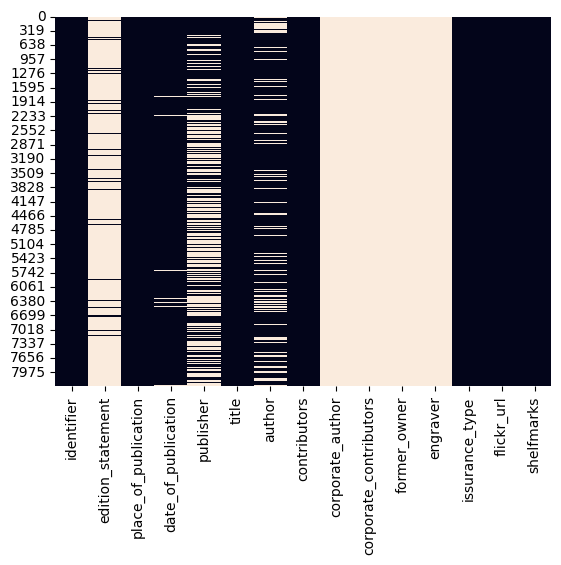

In [289]:
# Heatmap of missing values
sns.heatmap(df_flicker.isnull(), cbar=False)

From these two indicators, we notice that most of the columns have a high percentage of missing values. We will have to deal with these missing values in the next section as they can skew our analysis. I believe that columns containing missing values above 90% should be dropped. To mention some of the columns that we will be removing: <code>corporate_author</code>, <code>corporate_contributors</code>, <code>former_owner</code>, <code>engraver</code>, and <code>edition_statement</code>. We can also remove some other columns that are not very descriptive of the books such as <code>issurance_type</code>, and <code>shelfmarks</code>.

In [290]:
# Drop the mentioned columns
df_flicker.drop(["corporate_author", "corporate_contributors", "former_owner", "engraver", "edition_statement", "shelfmarks", "issurance_type"], axis=1, inplace=True)

In [291]:
df_flicker.head(5)

,identifier,place_of_publication,date_of_publication,publisher,title,author,contributors,flickr_url
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",http://www.flickr.com/photos/britishlibrary/ta...


### Cleaning fields in the data

Before continuing, it can be interesting to replace the indexes of the data set with the <code>identifier</code> column. This will make it easier to access the data set using the <code>identifier</code> column.

In [292]:
df_flicker.set_index('identifier', inplace=True)

In [293]:
df_flicker.head(5)

,place_of_publication,date_of_publication,publisher,title,author,contributors,flickr_url
identifier,,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",http://www.flickr.com/photos/britishlibrary/ta...


Let's take a look at the new shape of the data set:

In [294]:
print("The shape of the \"flicker.csv\" data set: ", df_flicker.shape)
print("Number of rows: ", df_flicker.shape[0])
print("Number of columns: ", df_flicker.shape[1])

The shape of the "flicker.csv" data set:  (8287, 7)
Number of rows:  8287
Number of columns:  7


We can now acces a book using its identifier with the <code>loc()</code> method and also access it with the <code>iloc()</code> method using its index.

Now that we have fewer but more relevant columns, let's take a look at the columns closely. In this dataframe it will be useless to use the method <code>describe()</code> as most of the columns are categorical. We will use the <code>value_counts()</code> method to get a better understanding of the data.

#### Date of publication

In the previous section we noticed that some columns needed to have a different type. Let's start by converting the <code>date_of_publication</code> column. 

In [295]:
df_flicker['date_of_publication']

identifier
206                      1879 [1878]
216                             1868
218                             1869
472                             1851
480                             1857
481                             1875
519                             1872
667                              NaN
874                             1676
1143                            1679
1280                            1802
1808                            1859
1905                            1888
1929                     1839, 38-54
2836                            1897
2854                            1865
2956                         1860-63
2957                            1873
3017                            1866
3131                            1899
4598                            1814
4884                            1820
4976                            1800
5382              1847, 48 [1846-48]
5385                         [1897?]
5389                         [1897?]
5432                       

A few things to note: some values in the <code>date_of_publication</code> column have extra dates, ranges or NaN values. So even before converting, we have to get the information that we deem necessary. For me I believe that the 4 first digits are necessary because by taking a closer we notice that there are some unwanted characters such as '[]', '-', ',', '?'.  

In [296]:
date = df_flicker['date_of_publication'].str.extract(r'^(\d{4})', expand=False) # r'^(\d{4})' means that we want to extract the first 4 digits of the string
date

identifier
206        1879
216        1868
218        1869
472        1851
480        1857
481        1875
519        1872
667         NaN
874        1676
1143       1679
1280       1802
1808       1859
1905       1888
1929       1839
2836       1897
2854       1865
2956       1860
2957       1873
3017       1866
3131       1899
4598       1814
4884       1820
4976       1800
5382       1847
5385        NaN
5389        NaN
5432       1893
6036       1805
6821       1837
7521       1896
7630       1898
8239       1899
8435       1892
8440       1894
11361       NaN
11852       NaN
13074      1899
13364       NaN
14466       NaN
14703      1846
15141      1893
15146      1894
16173      1817
16543      1816
16544      1817
17602      1897
17752       NaN
18173      1804
18218      1859
18347      1777
18469      1799
19340      1827
20207      1866
20960      1853
21119      1874
21430      1790
21782       NaN
22060      1883
22105      1795
22278      1865
23565      1877
24344      18

Now that we have the values that we want, we can convert it to a numeric type. We will use the <code>to_numeric()</code> method from pandas to convert the column to a numeric type. The reason we do not convert to datetime is because we are not interested in the date but rather the year.

In [297]:
df_flicker['date_of_publication'] = pd.to_numeric(date)

Previously we noted that only 2% of the dates were missing. We can remove these rows as they will not affect our analysis. We will not drop them but rather create a new DataFrame that does not contain these rows.

In [298]:
df_flicker = df_flicker[df_flicker['date_of_publication'].notna()]

#### Author

Now let's move on to the column <code>author</code> as it's the column with the most missing values in the new dataframe.

In [299]:
df_flicker['author'].value_counts()

author
Shakespeare, William                                                                                                                                                                                                                                                                                                                                                                                                                                                          44
Byron, George Gordon Byron - Baron                                                                                                                                                                                                                                                                                                                                                                                                                                            35
NORIE, John William.                                           

In [300]:
# Most frequent authors
df_flicker['author'].value_counts().head(10)

author
Shakespeare, William                  44
Byron, George Gordon Byron - Baron    35
NORIE, John William.                  26
Scott, Walter - Sir                   25
Goldsmith, Oliver                     18
Burns, Robert                         18
Milton, John                          16
Shelley, Percy Bysshe                 16
Besant, Walter - Sir                  13
Dickens, Charles                      13
Name: count, dtype: int64

In [301]:
# Find the unique values in the 'authors' column
unique_authors = df_flicker['author'].unique()

unique_authors

array(['A. A.', 'A., A. A.', 'A., E. S.', ...,
       'FORDYCE, T. - Printer, of Newcastle-upon-Tyne',
       'GIDDY, afterwards GILBERT, Davies.', 'Mackenzie, E. (Eneas)'],
      dtype=object)

We notice that the author <code>Shakespeare, William</code> is the most frequent author in the data set. We can also notice that there is some type of recurring structure in how the names of the authors are saved. We have the <b>LAST NAME</b>, <b>first name</b> - <b>additional information</b> (might not be important). We can find a way to extract the first and last name of the authors. We can do this by using the <code>split()</code> method. This method will split the string into a list of strings. We can then use the <code>str()</code> method to access the first and last name of the author and then join them together.

In [302]:
# Let's start by splitting the author's name into two columns: first_name and last_name
df_flicker[['last_name', 'first_name']] = df_flicker['author'].str.split(',', n=1, expand=True)

In [303]:
#replace the NaN values with a space
df_flicker['first_name'] = df_flicker['first_name'].replace(np.nan, ' ')

# create a list from the first_name column
first_names = list(df_flicker['first_name'])

# create a new list to contain just the information we want
new_first_names = []

# iterate over the first_names and collect the information we want:
for name in first_names:
    if name is None or name == np.nan or name == 'nan':
        new_first_names.append(np.nan)
    else:
        new_first_names.append(re.search(r'([^-]+)', name).group(0))

# change the first_name column to the new_first_names list
df_flicker['first_name'] = new_first_names

# join the first_name and last_name columns together
df_flicker['author'] = df_flicker['first_name'].str.cat(df_flicker['last_name'], sep=' ')

# drop the first_name and last_name columns
df_flicker.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [304]:
df_flicker.head()

,place_of_publication,date_of_publication,publisher,title,author,contributors,flickr_url
identifier,,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A. A. A.,"BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,A. A. A.,"BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...",E. S. A.,"Appleyard, Ernest Silvanus.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...",E. S. A.,"BROOME, John Henry.",http://www.flickr.com/photos/britishlibrary/ta...


#### Title

Let us now see what we can do with the <code>title</code> column. The name of the column is title and yet we notice that the rows contain other information other than the column. We can see that the title of the book is always the first element in the list. We can use the regex method to extract the title of the book. We can then create a new column with the title of the book.

In [305]:
#create a list from the title column
title_list = list(df_flicker['title'])

#create a new list to contain just the titles
titles = []

#iterate over the title_list to access each individual element of the dataframe and use regexp to search for just the titles and add it to the titles list
for element in title_list:
    titles.append(re.search(r'([^.;:]+)', element).group(0).replace('[',''))

In [306]:
#put the new values inside the dataframe
df_flicker['title'] = titles

In [307]:
df_flicker.head(5)

,place_of_publication,date_of_publication,publisher,title,author,contributors,flickr_url
identifier,,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes,A. A.,"FORBES, Walter.",http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed,A. A. A.,"BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger,A. A. A.,"BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...",E. S. A.,"Appleyard, Ernest Silvanus.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"The World in which I live, and my place in it",E. S. A.,"BROOME, John Henry.",http://www.flickr.com/photos/britishlibrary/ta...


#### Place of publication

In [308]:
df_flicker['place_of_publication'].value_counts()

place_of_publication
London                                            3430
Paris                                              429
Edinburgh                                          204
New York                                           156
Leipzig                                            112
Philadelphia                                        81
Berlin                                              64
Boston [Mass.]                                      52
Dublin                                              42
Glasgow                                             41
Oxford                                              41
Boston                                              39
Wien                                                36
Stockholm                                           32
Madrid                                              32
Cambridge                                           25
Firenze                                             24
Bruxelles                                   

By looking at the <code>values_counts()</code> method, we notice that there are some values that are the same but are written differently. For example, we have <code>London</code> and <code>London]</code>. We can use the <code>replace()</code> method to replace the values that are the same but are written differently. From the results that we got when we checked for null values, <code>place_of_publication</code> does not have any missing values.

In [309]:
# We notice that some of the values that have additional information in brackets are seperated by either a comma or a semicolon
# We will use the replace method to replace the semicolon with a comma
df_flicker['place_of_publication'] = df_flicker['place_of_publication'].str.replace(';', ',')

# Next for the Boston, it is written differently in some rows, so we will replace the different values with the same one
# search for the rows starting with Boston, replace everything after with just a space
df_flicker['place_of_publication'] = df_flicker['place_of_publication'].str.replace('^Boston.*', 'Boston', regex=True)

# Replace Londres with London
df_flicker['place_of_publication'] = df_flicker['place_of_publication'].str.replace('^Londres.*', 'London', regex=True)
df_flicker['place_of_publication'] = df_flicker['place_of_publication'].str.replace('Lond[on]', 'London')

# I tried looking for a method to replace the values that end with either ? or ] with just a space, but to no avail

 In the end we could still notice some slight changes but there were too many inconsistencies in the data set to fix them all. 

In [310]:
df_flicker['place_of_publication'].value_counts()

place_of_publication
London                                            3435
Paris                                              429
Edinburgh                                          204
New York                                           156
Boston                                             116
Leipzig                                            112
Philadelphia                                        81
Berlin                                              64
Dublin                                              42
Glasgow                                             41
Oxford                                              41
Wien                                                36
Stockholm                                           32
Madrid                                              32
Cambridge                                           25
Firenze                                             24
Bruxelles                                           23
Amsterdam                                   

I cleaned the "Flicker" dataset by following a systematic approach. I began by importing the necessary libraries and loading the dataset. Next, I examined and gained an understanding of the data, which allowed me to identify potential issues and areas that required cleaning.

One of the initial steps involved checking for null values within the dataset. In cases where columns had a significant number of null values, I made the decision to remove those columns from the dataset entirely After addressing the null values, I proceeded to clean each column individually. This involved applying specific cleaning techniques tailored to the characteristics and requirements of each column. 